In [3]:
import pandas as pd
import numpy as np

# we're also going to import plotting library to help us visualize
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns                ## For create charts e.g. histogram   

In [4]:
dfdeath = pd.read_csv("pasay_compressed/Pasay_2005_csv/hpq_death.csv")
dfhh = pd.read_csv("pasay_compressed/Pasay_2005_csv/hpq_hh.csv")
dfgov = pd.read_csv("pasay_compressed/Pasay_2005_csv/hpq_prog_gov.csv")
dfgov_edited = dfgov

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (11,13,53,58,60,61,64,66,75,141,143,144,145,146,147,148,149,150,151,153,156,166,168,170,205,206,207,208,209,211,212,214,215,216,217,218,225,229,230,231,232,234,235,236) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## DATA CLEANING

In [5]:
# show all that have NaNs

dfdeath.loc[dfdeath["mdeady_o"].isnull(), "mdeady_o"] = "-"

In [6]:
dfdeath.reset_index()

,index,urb,regn,prov,mun,brgy,purok,hcn,death_line,mdeadsx,mdeadage,mdeady,mdeady_o
0,0,Urban,13,76,5,2,99,101553,1,Male,62,Diarrhea,-
1,1,Urban,13,76,5,2,99,101692,1,Male,22,Diseases of the heart,-
2,2,Urban,13,76,5,2,99,101702,1,Male,48,"Other causes, specify _____",AKSIDENTE
3,3,Urban,13,76,5,2,99,212,1,Female,39,Accident (ex. hit by a vehicle),-
4,4,Urban,13,76,5,2,99,232,1,Female,83,Diseases of the heart,-
5,5,Urban,13,76,5,2,99,217,1,Female,77,Diabetes,-
6,6,Urban,13,76,5,2,99,243,1,Female,79,Diseases of the heart,-
7,7,Urban,13,76,5,2,99,188,1,Male,80,Diseases of the heart,-
8,8,Urban,13,76,5,4,99,2016,1,Male,45,Accident (ex. hit by a vehicle),-
9,9,Urban,13,76,5,4,99,2357,1,Male,69,Pneumonia,-


In [7]:
dfdeath.mdeady_o.unique()

array(['-', 'AKSIDENTE', 'KIDNEY FAILURE', 'UNEXPLAIN', 'HEAT STROKE',
       'STROKE', 'KATANDAAN', 'SALVAGE', 'OLD', 'DIABETIS', 'OLD AGE',
       '--', 'OLDERNESS', 'SAKIT SA PUSO', 'DIABETES', 'CARDIAC ARREST',
       'CANCER', 'ACCIDENT', 'ASTHMA', 'LOW BLOOD', 'KIDNEY', 'SUICIDE',
       'LOPUS', 'COMPLIKASYON', 'HEART ATTACK', 'NABARIL',
       'BLOOD INFECTION', 'PAGKATANDA', 'EMPHYSEMA', 'KATANDAAN\\',
       'PINATAY', 'HIGH BLOOD', 'BRONCHITIS', 'BANGUNGOT', 'PREMATURE',
       'BINARIL', 'MULTIPLE ORGAN FAIL.', 'LEUKEMIA', 'KUMPLIKASYON',
       'PAPTIC ULCER', 'RECTAL MASS', 'SAKIT', 'LEPTOSPIROSIS',
       'INFECTION', 'BIRONIL', 'BLOOD CLOT HEAD', 'COMPLICATION PROSPAT',
       'SAKIT NG TYAN', 'VICTIM EARTHQUAKE', 'BRAIN TUMOR', 'SEPSIS',
       'PROSTATE', 'STOKE', 'ASHMA', 'DI NA NAGISING', 'MATANDA NA',
       'TYPHOID', 'HIGHBLOOD', 'TYPHOID FEVER', 'NALUNOG', 'HYPERTENSION',
       'ANUERYSM', 'KATANDAAN NA', 'LIVER SEROSIS', 'CDI',
       'PROSTATE CANCER', 'COLON

In [8]:
# Putting the mdeady_o values in different arrays in order to classify them

accident = ["AKSIDENTE", "ACCIDENT", "NANUNO", "NAKULAM", "NALUNOD", "BAGYONG SENDONG", "NABANGGA NG MOTOR", "NABUNDOL", "BANGUNGOT", "DI NA NAGISING", "BANGUGOT", "VICTIM EARTHQUAKE", "NALUNOG"]
kidney = ["KIDNEY FAILURE", "SA KIDNEY", "KIDNEY", "KIDNEY INFECTION", "BATO"]
stroke = ["HEAT STROKE", "STROKE", "STOKE", "HYPERTENSION STROKE"]
old = ["KATANDAAN", "OLD", "OLD AGE", "OLDERNESS", "KATANDAAN\\", "MATANDA NA", "KATANDAAN NA", "PAGTANDA", "AGING", "SA KATANDAAN", ",KATANDAAN"]
diabetes = ["DIABETIS", "DIABETES", "DIABETIC"]
unknown = ["--","NO FINDINGS","UNEXPLAIN","SALVAGE","KUMPLIKASYON","COMPLICATION PROSPAT","SAKIT", "COMPLIKASYON", "COMPLICATION PROSPAT", "SAKIT"]
heart = ["SAKIT SA PUSO","CARDIAC ARREST","HEART ATTACK","HEART ATTACH","CARDIAC","ATAKE"]
cancer = ["CANCER", "PROSTATE CANCER", "LIVER CANCER", "BONE CANCER", "TUMOR CANCER", "PROSTATE", "TUMOR", "LEUKEMIA",
        "COLON CANCER"]
vascular = ["LOW BLOOD", "HIGH BLOOD","HIGHBLOOD", "9HIGHBLOOD", "HEMORRAGE", "HEMMORAGE", "SEPSIS", "SEPTIC SHOCK",
            "INTERNAL BLEEDING", "BLOOD COMPLICATION", "9HIGHBLOOD]"]
suicide = ["SUICIDE"]
murdered = ["PINATAY","MASSACRE","NASAKSAK", "MURDER", "NABARIL", "BINARIL"]
liver = ["LIVER SEROSIS", "LIVER CIROSIS","SOMASIS LIVER", "ATAY", "LIVER", "SAKIT SA ATAY", "SERSIS"]
other = ["MULTIPLE ORGAN FAIL.", "RECTAL MASS", "LEPTOSPIROSIS", "INFECTION","ONFECTION", "BIRONIL", "SAKIT NG TYAN",
          "BLOOD CLOT HEAD", "BRAIN TUMOR", "HYPERTENSION", "TYPHOID", "TYPHOID FEVER", "HYPERTENSION", "HYPERTENSION",
          "ANUERYSM","KOMPLIKASYON SA LUS", "CDI", "LBM", "ANEMIC", "PLASTIC ANEMIA", "EPHESEMIA", "ALZHAIMER","ATHRITIS", "TIGDAS","TETANUS",
        "DENGUE", "HEPATITIS", "HEPA", "MININGITIS","MENINGITIS", "DEHYDRATE", "HYDRATE", "GALL BLADDER", "ALMORANAS",
         "DOWN SYNDROME", "SEPCIOUS SHOCK"]
ulcer = ["ULCER", "ADULT ULCER", "PAPTIC ULCER"]
pregnancy = ["NAKUNAN", "PREMATURE","PRE MATURE", "PUMULUPOT ANG PUSOD", "KULANG SA BUWAN"]
lungs = ["WEAR LUNGS", "EMPHYSEMA","ASTHMA", "ASHMA", "ASTHMATIC", "ASHMATIC", "HIKA", "BRONCHITIS"]
intestine = ["BITUKA", "PAMAMAGA NG BITUKA", "PAMAMAGA NG BITUKA"]
pneumonia = ["PNEUMONIA", "PEUMONIA", "PNUEMONIA"]
lupus = ["LUFUS", "LUPUS", "LOPUS"]

In [9]:
# normalize types of death into another column "death_combine"

others=[]

for x, y in enumerate(dfdeath['mdeady'], start = 0):
    if y == "Other causes, specify _____":
        if dfdeath.loc[x, 'mdeady_o'] in accident:
            others.append("Accident (ex. hit by a vehicle)")
            
        elif dfdeath.loc[x, 'mdeady_o'] in kidney:
            others.append("Diseases of the kidney")
            
        elif dfdeath.loc[x, 'mdeady_o'] in stroke:
            others.append("Stroke")
            
        elif dfdeath.loc[x, 'mdeady_o'] in old:
            others.append("Old Age")
            
        elif dfdeath.loc[x, 'mdeady_o'] in diabetes:
            others.append("Diabetes")
            
        elif dfdeath.loc[x, 'mdeady_o'] in unknown:
            others.append("Unknown")
            
        elif dfdeath.loc[x, 'mdeady_o'] in heart:
            others.append("Diseases of the heart")
            
        elif dfdeath.loc[x, 'mdeady_o'] in cancer:
            others.append("Cancer")
            
        elif dfdeath.loc[x, 'mdeady_o'] in vascular:
            others.append("Diseases of the vascular system")
            
        elif dfdeath.loc[x, 'mdeady_o'] in suicide:
            others.append("Suicide")
            
        elif dfdeath.loc[x, 'mdeady_o'] in murdered:
            others.append("Murdered")
            
        elif dfdeath.loc[x, 'mdeady_o'] in liver:
            others.append("Diseases of the Liver")
            
        elif dfdeath.loc[x, 'mdeady_o'] in other:
            others.append("Others")
            
        elif dfdeath.loc[x, 'mdeady_o'] in ulcer:
            others.append("Ulcer")
            
        elif dfdeath.loc[x, 'mdeady_o'] in pregnancy:
            others.append("Complication during pregnancy or childbirth")
            
        elif dfdeath.loc[x, 'mdeady_o'] in lungs:
            others.append("Disease of the lungs")
            
        elif dfdeath.loc[x, 'mdeady_o'] in intestine:
            others.append("Disease of the Intestine")
            
        elif dfdeath.loc[x, 'mdeady_o'] in pneumonia:
            others.append("Pneumonia")
            
        elif dfdeath.loc[x, 'mdeady_o'] in lupus:
            others.append("Lupus")
            
        elif dfdeath.loc[x, 'mdeady_o'] == "-":
            others.append("Others")
        
        else: 
            others.append("EXTRAS")
    else:
        others.append(y)
    
dfdeath = dfdeath.assign(cause_death = others)

In [10]:
dfdeath.reset_index()

,index,urb,regn,prov,mun,brgy,purok,hcn,death_line,mdeadsx,mdeadage,mdeady,mdeady_o,cause_death
0,0,Urban,13,76,5,2,99,101553,1,Male,62,Diarrhea,-,Diarrhea
1,1,Urban,13,76,5,2,99,101692,1,Male,22,Diseases of the heart,-,Diseases of the heart
2,2,Urban,13,76,5,2,99,101702,1,Male,48,"Other causes, specify _____",AKSIDENTE,Accident (ex. hit by a vehicle)
3,3,Urban,13,76,5,2,99,212,1,Female,39,Accident (ex. hit by a vehicle),-,Accident (ex. hit by a vehicle)
4,4,Urban,13,76,5,2,99,232,1,Female,83,Diseases of the heart,-,Diseases of the heart
5,5,Urban,13,76,5,2,99,217,1,Female,77,Diabetes,-,Diabetes
6,6,Urban,13,76,5,2,99,243,1,Female,79,Diseases of the heart,-,Diseases of the heart
7,7,Urban,13,76,5,2,99,188,1,Male,80,Diseases of the heart,-,Diseases of the heart
8,8,Urban,13,76,5,4,99,2016,1,Male,45,Accident (ex. hit by a vehicle),-,Accident (ex. hit by a vehicle)
9,9,Urban,13,76,5,4,99,2357,1,Male,69,Pneumonia,-,Pneumonia


In [11]:
# this shows which columns have null/nan values
dfdeath.columns[dfdeath.isnull().any()]

Index(['mdeady', 'cause_death'], dtype='object')

In [12]:
# declares if the COD is a disease of the heart or not

trues=[]
for x,y in enumerate(dfdeath['mdeady'], start = 0):
    if y == "Diseases of the heart" :
        trues.append("True")
        
    elif y == "Other causes, specify _____":
        
        if dfdeath.loc[x, 'mdeady_o'] == "CARDIAC ARREST" or dfdeath.loc[x, 'mdeady_o'] == "HEART ATTACK" or dfdeath.loc[x, 'mdeady_o'] == "HEART ATTACH" or dfdeath.loc[x, 'mdeady_o'] == "CARDIAC" or dfdeath.loc[x, 'mdeady_o'] == "ATAKE":
            trues.append("True")
        else:
            trues.append("False")
    else:
        trues.append("False")
        
dfdeath = dfdeath.assign(death_combine = trues)

In [13]:
dfdeath.reset_index()

,index,urb,regn,prov,mun,brgy,purok,hcn,death_line,mdeadsx,mdeadage,mdeady,mdeady_o,cause_death,death_combine
0,0,Urban,13,76,5,2,99,101553,1,Male,62,Diarrhea,-,Diarrhea,False
1,1,Urban,13,76,5,2,99,101692,1,Male,22,Diseases of the heart,-,Diseases of the heart,True
2,2,Urban,13,76,5,2,99,101702,1,Male,48,"Other causes, specify _____",AKSIDENTE,Accident (ex. hit by a vehicle),False
3,3,Urban,13,76,5,2,99,212,1,Female,39,Accident (ex. hit by a vehicle),-,Accident (ex. hit by a vehicle),False
4,4,Urban,13,76,5,2,99,232,1,Female,83,Diseases of the heart,-,Diseases of the heart,True
5,5,Urban,13,76,5,2,99,217,1,Female,77,Diabetes,-,Diabetes,False
6,6,Urban,13,76,5,2,99,243,1,Female,79,Diseases of the heart,-,Diseases of the heart,True
7,7,Urban,13,76,5,2,99,188,1,Male,80,Diseases of the heart,-,Diseases of the heart,True
8,8,Urban,13,76,5,4,99,2016,1,Male,45,Accident (ex. hit by a vehicle),-,Accident (ex. hit by a vehicle),False
9,9,Urban,13,76,5,4,99,2357,1,Male,69,Pneumonia,-,Pneumonia,False


In [14]:
# taking out the NaNs for mdeady

# put all indexes of the rows that have NaN values in a []
nans = []
nans.append(dfdeath.loc[dfdeath["mdeady"].isnull()].index.values)
     
# go through all the rows & drop them 

x = 0
for x in range(len(nans)):  
    dfdeath = dfdeath.drop(nans[x])

In [15]:
dfdeath.reset_index()

,index,urb,regn,prov,mun,brgy,purok,hcn,death_line,mdeadsx,mdeadage,mdeady,mdeady_o,cause_death,death_combine
0,0,Urban,13,76,5,2,99,101553,1,Male,62,Diarrhea,-,Diarrhea,False
1,1,Urban,13,76,5,2,99,101692,1,Male,22,Diseases of the heart,-,Diseases of the heart,True
2,2,Urban,13,76,5,2,99,101702,1,Male,48,"Other causes, specify _____",AKSIDENTE,Accident (ex. hit by a vehicle),False
3,3,Urban,13,76,5,2,99,212,1,Female,39,Accident (ex. hit by a vehicle),-,Accident (ex. hit by a vehicle),False
4,4,Urban,13,76,5,2,99,232,1,Female,83,Diseases of the heart,-,Diseases of the heart,True
5,5,Urban,13,76,5,2,99,217,1,Female,77,Diabetes,-,Diabetes,False
6,6,Urban,13,76,5,2,99,243,1,Female,79,Diseases of the heart,-,Diseases of the heart,True
7,7,Urban,13,76,5,2,99,188,1,Male,80,Diseases of the heart,-,Diseases of the heart,True
8,8,Urban,13,76,5,4,99,2016,1,Male,45,Accident (ex. hit by a vehicle),-,Accident (ex. hit by a vehicle),False
9,9,Urban,13,76,5,4,99,2357,1,Male,69,Pneumonia,-,Pneumonia,False


In [16]:
# displays all types of death in list

dfdeath.mdeady.unique()

array(['Diarrhea', 'Diseases of the heart', 'Other causes, specify _____',
       'Accident (ex. hit by a vehicle)', 'Diabetes', 'Pneumonia',
       'Disease of the lungs', 'Tuberculosis', 'Cancer',
       'Diseases of the vascular system',
       'Complication during pregnancy or childbirth',
       'Electrocuted during typhoon', 'Disease of the kidney',
       'Drowned from flood', 'Measles'], dtype=object)

In [17]:
# Checks if there are other causes of death that weren't accounted for

print(dfdeath.loc[dfdeath['cause_death'] == "EXTRAS"])

Empty DataFrame
Columns: [urb, regn, prov, mun, brgy, purok, hcn, death_line, mdeadsx, mdeadage, mdeady, mdeady_o, cause_death, death_combine]
Index: []


In [18]:
# this shows which columns have null/nan values
dfgov.columns[dfgov.isnull().any()]

Index(['prog_line_g', 'prog_type_g', 'progind_g', 'prog_implentor_g',
       'prog_implementor_o_g', 'progmem_g_bene', 'progmem_g', 'progmem_g2',
       'progmem_g3', 'progmem_g4', 'progmem_g5', 'prograting_g'],
      dtype='object')

In [19]:
dfgov

,urb,regn,prov,mun,brgy,purok,hcn,prog_line_g,prog_type_g,progind_g,prog_implentor_g,prog_implementor_o_g,progmem_g_bene,progmem_g,progmem_g2,progmem_g3,progmem_g4,progmem_g5,prograting_g
0,Urban,13,76,5,1,99,20,1.0,Pantawid Pamilyang Pilipino Program (4Ps) - Co...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Urban,13,76,5,1,99,20,2.0,NFA rice program,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Urban,13,76,5,1,99,20,3.0,Comprehensive Agrarian Reform Program (CARP),No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Urban,13,76,5,1,99,20,4.0,Philhealth - OFW,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Urban,13,76,5,1,99,20,5.0,Philhealth - Employed,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Urban,13,76,5,1,99,20,6.0,Philhealth - Individually paying,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Urban,13,76,5,1,99,20,7.0,Philhealth - Sponsored,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Urban,13,76,5,1,99,20,8.0,Philhealth - Lifetime,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Urban,13,76,5,1,99,20,9.0,Food for School,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Urban,13,76,5,1,99,20,10.0,Food for Work,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# removing unnecessary columns in dfgov

col_list = ["urb", "regn", "purok", "mun", "brgy", "hcn", "prog_line_g", "prog_type_g", "progind_g"]

dfgov_edited = dfgov[col_list]
dfgov_edited

,urb,regn,purok,mun,brgy,hcn,prog_line_g,prog_type_g,progind_g
0,Urban,13,99,5,1,20,1.0,Pantawid Pamilyang Pilipino Program (4Ps) - Co...,No
1,Urban,13,99,5,1,20,2.0,NFA rice program,No
2,Urban,13,99,5,1,20,3.0,Comprehensive Agrarian Reform Program (CARP),No
3,Urban,13,99,5,1,20,4.0,Philhealth - OFW,No
4,Urban,13,99,5,1,20,5.0,Philhealth - Employed,No
5,Urban,13,99,5,1,20,6.0,Philhealth - Individually paying,No
6,Urban,13,99,5,1,20,7.0,Philhealth - Sponsored,No
7,Urban,13,99,5,1,20,8.0,Philhealth - Lifetime,No
8,Urban,13,99,5,1,20,9.0,Food for School,No
9,Urban,13,99,5,1,20,10.0,Food for Work,No


In [21]:
# this shows which columns have null/nan values

for x in dfgov.columns[dfgov.isnull().any()]:
    print(x)

prog_line_g
prog_type_g
progind_g
prog_implentor_g
prog_implementor_o_g
progmem_g_bene
progmem_g
progmem_g2
progmem_g3
progmem_g4
progmem_g5
prograting_g


In [30]:
# indicates whether all 2 fields are NaN at the same time

cols_to_check = ['prog_line_g', 'prog_type_g']
dfgov_edited['is_na'] = dfgov_edited[cols_to_check].isnull().apply(lambda x: all(x), axis=1) 

dfgov_edited

,index,urb,regn,purok,mun,brgy,hcn,prog_line_g,prog_type_g,progind_g,is_na
0,847717,Urban,13,1,5,201,94015,12.0,Day Care Center services,No,False
1,506705,Urban,13,1,5,165,44393,12.0,Day Care Center services,No,False
2,506706,Urban,13,1,5,165,44225,1.0,Pantawid Pamilyang Pilipino Program (4Ps) - Co...,No,False
3,506707,Urban,13,1,5,165,44225,2.0,NFA rice program,No,False
4,506708,Urban,13,1,5,165,44225,3.0,Comprehensive Agrarian Reform Program (CARP),No,False
5,506709,Urban,13,1,5,165,44225,4.0,Philhealth - OFW,No,False
6,506710,Urban,13,1,5,165,44225,5.0,Philhealth - Employed,No,False
7,506711,Urban,13,1,5,165,44225,6.0,Philhealth - Individually paying,No,False
8,506712,Urban,13,1,5,165,44225,7.0,Philhealth - Sponsored,No,False
9,506713,Urban,13,1,5,165,44225,8.0,Philhealth - Lifetime,No,False


In [31]:
dfgov_edited.prog_type_g.unique()

array(['Day Care Center services',
       'Pantawid Pamilyang Pilipino Program (4Ps) - Conditional Cash Transfer',
       'NFA rice program', 'Comprehensive Agrarian Reform Program (CARP)',
       'Philhealth - OFW', 'Philhealth - Employed',
       'Philhealth - Individually paying', 'Philhealth - Sponsored',
       'Philhealth - Lifetime', 'Food for School', 'Food for Work',
       'Self-Employment Assistance - Kaunlaran (SEA-K)', nan],
      dtype=object)

In [32]:
dfgov_edited = dfgov_edited.sort_values(['purok'], ascending=[1])
dfgov_edited = dfgov_edited.reset_index()

In [33]:
dfgov_edited

,level_0,index,urb,regn,purok,mun,brgy,hcn,prog_line_g,prog_type_g,progind_g,is_na
0,0,847717,Urban,13,1,5,201,94015,12.0,Day Care Center services,No,False
1,63301,747323,Urban,13,1,5,192,60275,12.0,Day Care Center services,No,False
2,63300,747324,Urban,13,1,5,192,60276,1.0,Pantawid Pamilyang Pilipino Program (4Ps) - Co...,No,False
3,63299,747325,Urban,13,1,5,192,60276,2.0,NFA rice program,No,False
4,63298,747326,Urban,13,1,5,192,60276,3.0,Comprehensive Agrarian Reform Program (CARP),No,False
5,63297,747327,Urban,13,1,5,192,60276,4.0,Philhealth - OFW,No,False
6,63296,747328,Urban,13,1,5,192,60276,5.0,Philhealth - Employed,No,False
7,63295,747329,Urban,13,1,5,192,60276,6.0,Philhealth - Individually paying,No,False
8,63294,747330,Urban,13,1,5,192,60276,7.0,Philhealth - Sponsored,No,False
9,63293,747331,Urban,13,1,5,192,60276,8.0,Philhealth - Lifetime,No,False


In [35]:
# Checks the unique values of "Purok" in the hpq_prog_gov and hpq_death CSV

dfgp = dfgov_edited.purok.unique()
dfdp = dfdeath.purok.unique()

In [36]:
# Puts unique values in an array

dfgov_purok = []
dfdeath_purok = []

for x in dfgp:
    dfgov_purok.append(x)

for x in dfdp:
    dfdeath_purok.append(x)
print(dfgp)
print(dfdp)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 72 81 83 98 99]
[99  1  2  4  3  5 15 37  6 17 36 32  7 33  8 25 11 57 56 55 53 39 34 43
 52 29 50 59 60 16 26 22 21 61 14 19 54 23 49 24 31 27  9 10 28 35 18 13
 30 12]


In [37]:
# Places the same values in dfdeath_purok & dfgov_purok in one array

same = []

for x, y in enumerate(dfgp):
    if y in dfdp:
        same.append(y)
        
print(same)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 43, 49, 50, 52, 53, 54, 55, 56, 57, 59, 60, 61, 99]


In [38]:
# Sorts "same",  dfgov_purok", and "dfdeath_purok" arrays to ascending order

def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

same_sorted = same
same_sorted = selection_sort(same_sorted)

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 39,
 43,
 49,
 50,
 52,
 53,
 54,
 55,
 56,
 57,
 59,
 60,
 61,
 99]

In [39]:
dfgov_purok = selection_sort(dfgov_purok)

In [40]:
dfdeath_purok = selection_sort(dfdeath_purok)

# GRAPHS

### Histogram 

Answers the questions: 
- Usually at what age does it start? 
- Which gender does it affect the most?

- To compare the population of deaths by heart disease given the people's sex and age
- Determines the usual age & sex of those who die

Text(0.5,0,'Age')

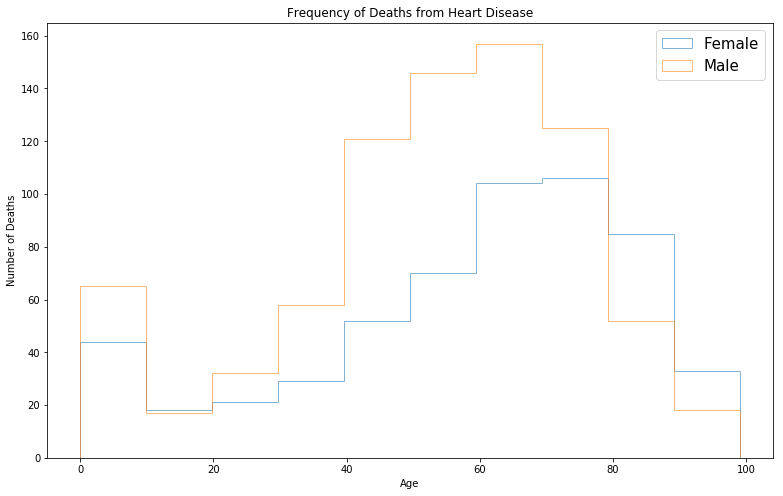

In [41]:
# setting size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 13
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.title('Frequency of Deaths from Heart Disease')
plt.rcParams.update({'font.size': 15})
dfdeath.groupby('mdeadsx').mdeadage.plot(kind="hist",histtype='step', alpha=0.544)


plt.legend()
plt.ylabel('Number of Deaths')
plt.xlabel('Age')

#### FINDINGS

- People of age 55 and above usually die from heart disease.
- Males are usually more targeted by this disease as compared to females.

In [42]:
dfdeath.describe()

,regn,prov,mun,brgy,purok,hcn,death_line,mdeadage
count,1353.0,1353.0,1353.0,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000
mean,13.0,76.0,5.0,142.814486,45.675536,61637.912047,1.056171,55.171471
std,0.0,0.0,0.0,59.288399,44.332413,30609.332945,0.245870,23.869750
min,13.0,76.0,5.0,2.000000,1.000000,188.000000,1.000000,0.000000
25%,13.0,76.0,5.0,99.000000,2.000000,38378.000000,1.000000,42.000000
50%,13.0,76.0,5.0,178.000000,30.000000,60449.000000,1.000000,60.000000
75%,13.0,76.0,5.0,189.000000,99.000000,86729.000000,1.000000,73.000000
max,13.0,76.0,5.0,201.000000,99.000000,116743.000000,3.000000,99.000000


## HYPOTHESIS TESTING

$H_0$: $\mu = 55$ The people who have a higher risk of dying from heart disease is 55 years old.

$H_a$: $\mu > 55$ The people who have a higher risk of die from heart disease is above 55 years old.

In [43]:
mu = 55 # assuming that the null hypothesis is true
n = len(dfdeath) # sample size

print("Population mean mu =",mu)
print("Sample size n =", n)

Population mean mu = 55
Sample size n = 1353


#### LEVEL OF SIGNIFICANCE

From the given situation, $\alpha = 5\%$ or $\alpha = 0.05$

In [44]:
alpha = 0.05

Since $n$ is sufficiently large $(n>30)$, we can use the z-test.

$$Z = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}$$

In [45]:
from scipy.stats import norm
critical_value = norm.ppf(alpha) # same as the z-table look up
print("Critical Value", critical_value)

Critical Value -1.6448536269514729


In [46]:
print("Decision Rule: Reject null hypothesis if Z < {:0.3f}. Otherwise, fail to reject null hypothesis".format(critical_value))

Decision Rule: Reject null hypothesis if Z < -1.645. Otherwise, fail to reject null hypothesis


In [47]:
x_bar = np.mean(dfdeath.mdeadage) # sample mean
s = np.sqrt(np.sum((dfdeath.mdeadage - x_bar)**2) / (n-1)) #sample standard deviation

print("Sample mean x_bar =",x_bar)
print("Sample standard deviation s =",s)

Sample mean x_bar = 55.17147080561715
Sample standard deviation s = 23.869749783226236


In [48]:
z = (x_bar - mu) / (s / np.sqrt(n)) # test statistic
print("Test statistic z =", z)

Test statistic z = 0.2642355337644078


#### DECISION

Since the value of $Z$ doesn't fall in the critical region, that is, z < -1.645, then fail to reject null hypothesis $H_0$.

#### CONCLUSION

At $\alpha = 5\%$, we don't have enough evidence to support the claim that the people of age 55 years old have a higher risk of dying from heart disease.

### Bar Graph

Answers the question:
- How frequently do people die from a heart disease?

##### BEFORE CLEANING

Other causes, specify _____                    423
Diseases of the heart                          382
Cancer                                         182
Diabetes                                       101
Pneumonia                                       60
Diseases of the vascular system                 53
Tuberculosis                                    40
Disease of the lungs                            35
Accident (ex. hit by a vehicle)                 33
Complication during pregnancy or childbirth     19
Diarrhea                                         9
Disease of the kidney                            7
Measles                                          4
Drowned from flood                               3
Electrocuted during typhoon                      2
Name: mdeady, dtype: int64


Text(0,0.5,'Cause of Death')

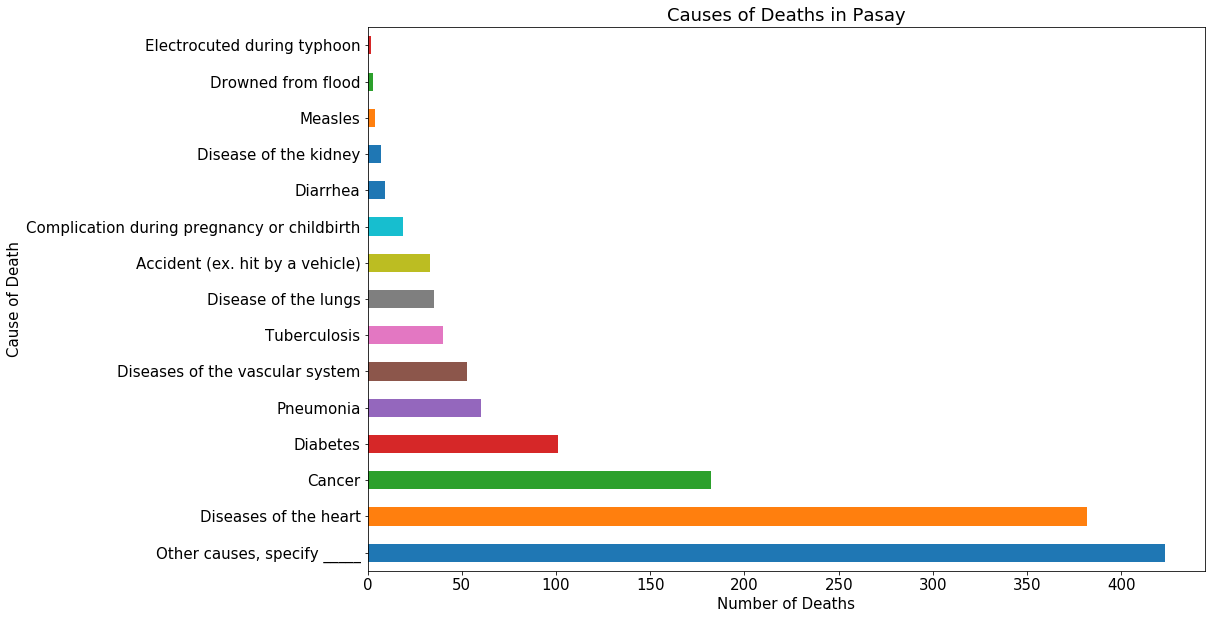

In [49]:
df_count = dfdeath["mdeady"].value_counts()
                  
print(df_count)

df_count.plot.barh(figsize=[15,10])
plt.title("Causes of Deaths in Pasay")
plt.xlabel('Number of Deaths')
plt.ylabel('Cause of Death')

##### AFTER CLEANING

Diseases of the heart                          395
Cancer                                         199
Others                                         149
Diabetes                                       106
Old Age                                         80
Diseases of the vascular system                 73
Pneumonia                                       66
Disease of the lungs                            50
Accident (ex. hit by a vehicle)                 49
Tuberculosis                                    40
Stroke                                          28
Complication during pregnancy or childbirth     26
Diseases of the kidney                          21
Murdered                                        13
Unknown                                         11
Diarrhea                                         9
Diseases of the Liver                            7
Disease of the kidney                            7
Measles                                          4
Suicide                        

Text(0,0.5,'Cause of Death')

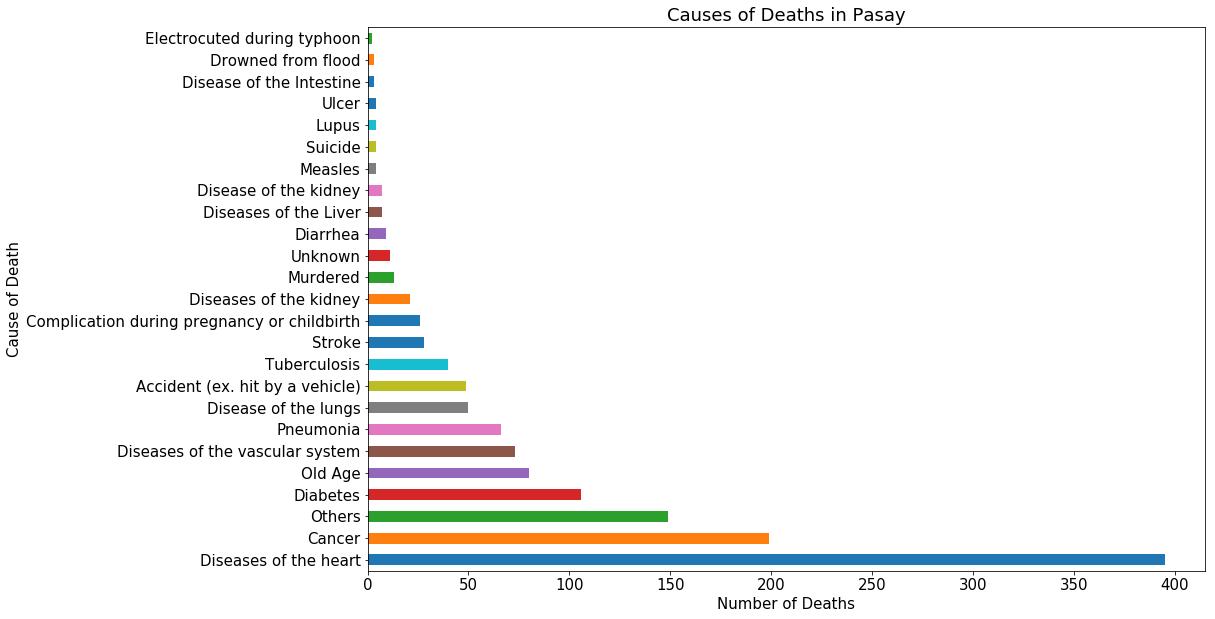

In [50]:
df_count = dfdeath["cause_death"].value_counts()
                  
print(df_count)

df_count.plot.barh(figsize=[15,10])
plt.title("Causes of Deaths in Pasay")
plt.xlabel('Number of Deaths')
plt.ylabel('Cause of Death')

#### FINDINGS

- There was a drastic difference between the population of those who dies from heart disease compared to other diseases.
- Before cleaning the data, the amount of death from "Other causes" seemed to have little difference with the amount of death from diseases of the heart. After cleaning and sorting out the different causes of death, it was apparent that disease of the heart caused the most number of deaths.

Answers the question:
- What types of programs are offered by the government, in relation to heart diseases?

Food for School                                                          25581
NFA rice program                                                          4050
Food for Work                                                             2934
Self-Employment Assistance - Kaunlaran (SEA-K)                            2571
Philhealth - Lifetime                                                     2023
Pantawid Pamilyang Pilipino Program (4Ps) - Conditional Cash Transfer     1463
Philhealth - Sponsored                                                    1153
Philhealth - OFW                                                           727
Day Care Center services                                                   577
Philhealth - Employed                                                       93
Philhealth - Individually paying                                            31
Comprehensive Agrarian Reform Program (CARP)                                15
Name: prog_type_g, dtype: int64


Text(0,0.5,'Programs')

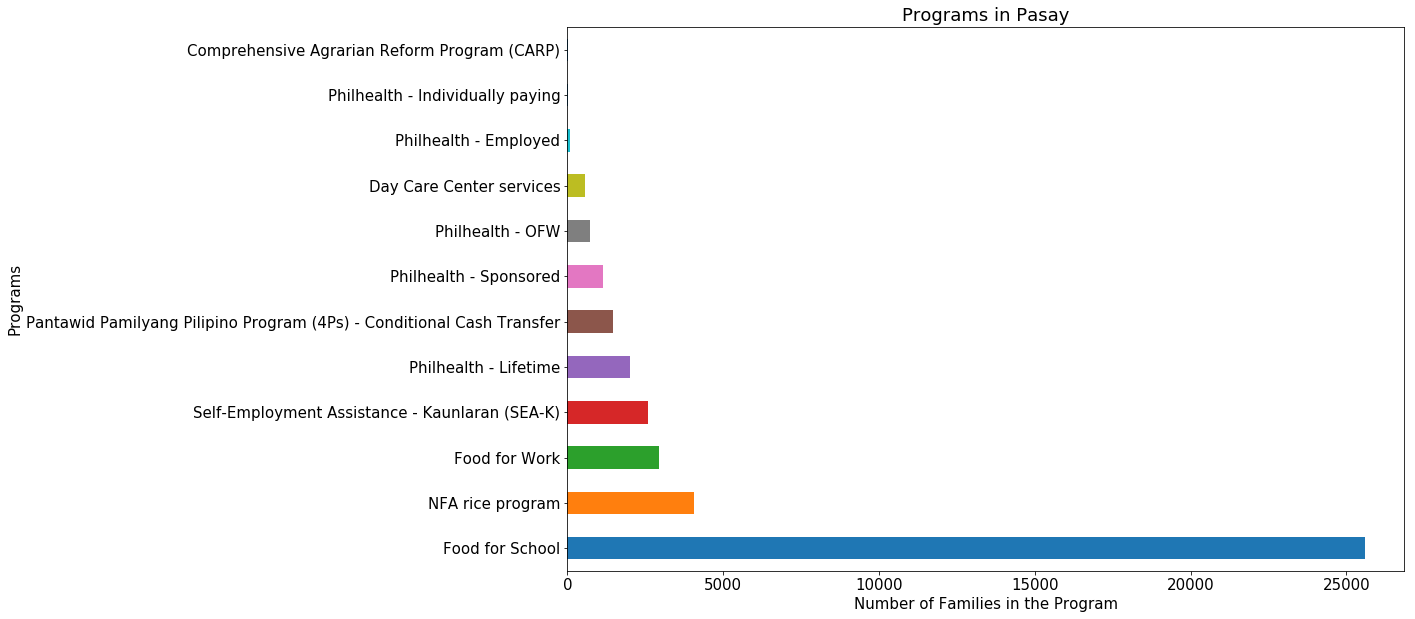

In [51]:
# Current count of Programs in Pasay

df_count = dfgov["prog_type_g"].loc[dfgov['progind_g'] == "Yes"].value_counts()
                  
print(df_count)

df_count.plot.barh(figsize=[15,10])
plt.title("Programs in Pasay")
plt.xlabel('Number of Families in the Program')
plt.ylabel('Programs')

In [52]:
philhealth = ['Philhealth - Lifetime','Philhealth - Sponsored','Philhealth - OFW','Philhealth - Employed','Philhealth - Individually paying' ]

In [53]:
print(len(dfdeath.purok.unique()))

50


In [54]:
print(len(dfgov_edited.purok.unique()))

66


In [55]:
# Gets the total num of deaths (caused by diseases of the heart) per purok

purok_prog_total = []
total = 0

for a in range(same_sorted[len(same_sorted)-1] + 1):
    if a in same_sorted:
        
        for b in range(len(same_sorted)):
            if a == same_sorted[b]:
                total = 0
                
                for x, y in dfgov_edited.iterrows():
                    if ((dfgov_edited.loc[x, 'purok'] == a) == True) and ((dfgov_edited.loc[x, 'prog_type_g'] in philhealth) == True) and ((dfgov_edited.loc[x, 'progind_g'] == "Yes") == True):
                        total = total+1
                        print("A: ", a, "PUROK: ", dfgov_edited.loc[x, 'purok'], "total: ", total)
                
                purok_prog_total.append(total)

A:  1 PUROK:  1 total:  1
A:  1 PUROK:  1 total:  2
A:  1 PUROK:  1 total:  3
A:  1 PUROK:  1 total:  4
A:  1 PUROK:  1 total:  5
A:  1 PUROK:  1 total:  6
A:  1 PUROK:  1 total:  7
A:  1 PUROK:  1 total:  8
A:  1 PUROK:  1 total:  9
A:  1 PUROK:  1 total:  10
A:  1 PUROK:  1 total:  11
A:  1 PUROK:  1 total:  12
A:  1 PUROK:  1 total:  13
A:  1 PUROK:  1 total:  14
A:  1 PUROK:  1 total:  15
A:  1 PUROK:  1 total:  16
A:  1 PUROK:  1 total:  17
A:  1 PUROK:  1 total:  18
A:  1 PUROK:  1 total:  19
A:  1 PUROK:  1 total:  20
A:  1 PUROK:  1 total:  21
A:  1 PUROK:  1 total:  22
A:  1 PUROK:  1 total:  23
A:  1 PUROK:  1 total:  24
A:  1 PUROK:  1 total:  25
A:  1 PUROK:  1 total:  26
A:  1 PUROK:  1 total:  27
A:  1 PUROK:  1 total:  28
A:  1 PUROK:  1 total:  29
A:  1 PUROK:  1 total:  30
A:  1 PUROK:  1 total:  31
A:  1 PUROK:  1 total:  32
A:  1 PUROK:  1 total:  33
A:  1 PUROK:  1 total:  34
A:  1 PUROK:  1 total:  35
A:  1 PUROK:  1 total:  36
A:  1 PUROK:  1 total:  37
A:  1 PURO

A:  1 PUROK:  1 total:  300
A:  1 PUROK:  1 total:  301
A:  1 PUROK:  1 total:  302
A:  1 PUROK:  1 total:  303
A:  1 PUROK:  1 total:  304
A:  1 PUROK:  1 total:  305
A:  1 PUROK:  1 total:  306
A:  1 PUROK:  1 total:  307
A:  1 PUROK:  1 total:  308
A:  1 PUROK:  1 total:  309
A:  1 PUROK:  1 total:  310
A:  1 PUROK:  1 total:  311
A:  1 PUROK:  1 total:  312
A:  1 PUROK:  1 total:  313
A:  1 PUROK:  1 total:  314
A:  1 PUROK:  1 total:  315
A:  1 PUROK:  1 total:  316
A:  1 PUROK:  1 total:  317
A:  1 PUROK:  1 total:  318
A:  1 PUROK:  1 total:  319
A:  1 PUROK:  1 total:  320
A:  1 PUROK:  1 total:  321
A:  1 PUROK:  1 total:  322
A:  1 PUROK:  1 total:  323
A:  1 PUROK:  1 total:  324
A:  1 PUROK:  1 total:  325
A:  1 PUROK:  1 total:  326
A:  1 PUROK:  1 total:  327
A:  1 PUROK:  1 total:  328
A:  1 PUROK:  1 total:  329
A:  1 PUROK:  1 total:  330
A:  1 PUROK:  1 total:  331
A:  1 PUROK:  1 total:  332
A:  1 PUROK:  1 total:  333
A:  1 PUROK:  1 total:  334
A:  1 PUROK:  1 tota

A:  2 PUROK:  2 total:  135
A:  2 PUROK:  2 total:  136
A:  2 PUROK:  2 total:  137
A:  2 PUROK:  2 total:  138
A:  2 PUROK:  2 total:  139
A:  2 PUROK:  2 total:  140
A:  2 PUROK:  2 total:  141
A:  2 PUROK:  2 total:  142
A:  2 PUROK:  2 total:  143
A:  2 PUROK:  2 total:  144
A:  2 PUROK:  2 total:  145
A:  2 PUROK:  2 total:  146
A:  2 PUROK:  2 total:  147
A:  2 PUROK:  2 total:  148
A:  2 PUROK:  2 total:  149
A:  2 PUROK:  2 total:  150
A:  2 PUROK:  2 total:  151
A:  2 PUROK:  2 total:  152
A:  2 PUROK:  2 total:  153
A:  2 PUROK:  2 total:  154
A:  2 PUROK:  2 total:  155
A:  2 PUROK:  2 total:  156
A:  2 PUROK:  2 total:  157
A:  2 PUROK:  2 total:  158
A:  2 PUROK:  2 total:  159
A:  2 PUROK:  2 total:  160
A:  2 PUROK:  2 total:  161
A:  2 PUROK:  2 total:  162
A:  2 PUROK:  2 total:  163
A:  2 PUROK:  2 total:  164
A:  2 PUROK:  2 total:  165
A:  2 PUROK:  2 total:  166
A:  2 PUROK:  2 total:  167
A:  2 PUROK:  2 total:  168
A:  2 PUROK:  2 total:  169
A:  2 PUROK:  2 tota

A:  2 PUROK:  2 total:  442
A:  2 PUROK:  2 total:  443
A:  2 PUROK:  2 total:  444
A:  2 PUROK:  2 total:  445
A:  2 PUROK:  2 total:  446
A:  2 PUROK:  2 total:  447
A:  2 PUROK:  2 total:  448
A:  2 PUROK:  2 total:  449
A:  2 PUROK:  2 total:  450
A:  2 PUROK:  2 total:  451
A:  2 PUROK:  2 total:  452
A:  2 PUROK:  2 total:  453
A:  2 PUROK:  2 total:  454
A:  2 PUROK:  2 total:  455
A:  2 PUROK:  2 total:  456
A:  2 PUROK:  2 total:  457
A:  2 PUROK:  2 total:  458
A:  2 PUROK:  2 total:  459
A:  2 PUROK:  2 total:  460
A:  2 PUROK:  2 total:  461
A:  2 PUROK:  2 total:  462
A:  2 PUROK:  2 total:  463
A:  2 PUROK:  2 total:  464
A:  2 PUROK:  2 total:  465
A:  2 PUROK:  2 total:  466
A:  2 PUROK:  2 total:  467
A:  2 PUROK:  2 total:  468
A:  2 PUROK:  2 total:  469
A:  2 PUROK:  2 total:  470
A:  2 PUROK:  2 total:  471
A:  2 PUROK:  2 total:  472
A:  2 PUROK:  2 total:  473
A:  2 PUROK:  2 total:  474
A:  2 PUROK:  2 total:  475
A:  2 PUROK:  2 total:  476
A:  2 PUROK:  2 tota

A:  3 PUROK:  3 total:  1
A:  3 PUROK:  3 total:  2
A:  3 PUROK:  3 total:  3
A:  3 PUROK:  3 total:  4
A:  3 PUROK:  3 total:  5
A:  3 PUROK:  3 total:  6
A:  3 PUROK:  3 total:  7
A:  3 PUROK:  3 total:  8
A:  3 PUROK:  3 total:  9
A:  3 PUROK:  3 total:  10
A:  3 PUROK:  3 total:  11
A:  3 PUROK:  3 total:  12
A:  3 PUROK:  3 total:  13
A:  3 PUROK:  3 total:  14
A:  3 PUROK:  3 total:  15
A:  3 PUROK:  3 total:  16
A:  3 PUROK:  3 total:  17
A:  3 PUROK:  3 total:  18
A:  3 PUROK:  3 total:  19
A:  3 PUROK:  3 total:  20
A:  3 PUROK:  3 total:  21
A:  3 PUROK:  3 total:  22
A:  3 PUROK:  3 total:  23
A:  3 PUROK:  3 total:  24
A:  3 PUROK:  3 total:  25
A:  3 PUROK:  3 total:  26
A:  3 PUROK:  3 total:  27
A:  3 PUROK:  3 total:  28
A:  3 PUROK:  3 total:  29
A:  3 PUROK:  3 total:  30
A:  3 PUROK:  3 total:  31
A:  3 PUROK:  3 total:  32
A:  3 PUROK:  3 total:  33
A:  3 PUROK:  3 total:  34
A:  3 PUROK:  3 total:  35
A:  3 PUROK:  3 total:  36
A:  3 PUROK:  3 total:  37
A:  3 PURO

A:  4 PUROK:  4 total:  103
A:  4 PUROK:  4 total:  104
A:  4 PUROK:  4 total:  105
A:  4 PUROK:  4 total:  106
A:  4 PUROK:  4 total:  107
A:  4 PUROK:  4 total:  108
A:  4 PUROK:  4 total:  109
A:  4 PUROK:  4 total:  110
A:  4 PUROK:  4 total:  111
A:  4 PUROK:  4 total:  112
A:  4 PUROK:  4 total:  113
A:  4 PUROK:  4 total:  114
A:  4 PUROK:  4 total:  115
A:  4 PUROK:  4 total:  116
A:  4 PUROK:  4 total:  117
A:  4 PUROK:  4 total:  118
A:  4 PUROK:  4 total:  119
A:  4 PUROK:  4 total:  120
A:  4 PUROK:  4 total:  121
A:  4 PUROK:  4 total:  122
A:  4 PUROK:  4 total:  123
A:  4 PUROK:  4 total:  124
A:  4 PUROK:  4 total:  125
A:  4 PUROK:  4 total:  126
A:  4 PUROK:  4 total:  127
A:  4 PUROK:  4 total:  128
A:  4 PUROK:  4 total:  129
A:  4 PUROK:  4 total:  130
A:  4 PUROK:  4 total:  131
A:  4 PUROK:  4 total:  132
A:  4 PUROK:  4 total:  133
A:  4 PUROK:  4 total:  134
A:  4 PUROK:  4 total:  135
A:  4 PUROK:  4 total:  136
A:  4 PUROK:  4 total:  137
A:  4 PUROK:  4 tota

A:  14 PUROK:  14 total:  16
A:  14 PUROK:  14 total:  17
A:  15 PUROK:  15 total:  1
A:  15 PUROK:  15 total:  2
A:  15 PUROK:  15 total:  3
A:  15 PUROK:  15 total:  4
A:  15 PUROK:  15 total:  5
A:  15 PUROK:  15 total:  6
A:  15 PUROK:  15 total:  7
A:  15 PUROK:  15 total:  8
A:  15 PUROK:  15 total:  9
A:  16 PUROK:  16 total:  1
A:  16 PUROK:  16 total:  2
A:  16 PUROK:  16 total:  3
A:  16 PUROK:  16 total:  4
A:  16 PUROK:  16 total:  5
A:  16 PUROK:  16 total:  6
A:  16 PUROK:  16 total:  7
A:  16 PUROK:  16 total:  8
A:  16 PUROK:  16 total:  9
A:  16 PUROK:  16 total:  10
A:  16 PUROK:  16 total:  11
A:  16 PUROK:  16 total:  12
A:  16 PUROK:  16 total:  13
A:  16 PUROK:  16 total:  14
A:  16 PUROK:  16 total:  15
A:  16 PUROK:  16 total:  16
A:  16 PUROK:  16 total:  17
A:  16 PUROK:  16 total:  18
A:  16 PUROK:  16 total:  19
A:  17 PUROK:  17 total:  1
A:  19 PUROK:  19 total:  1
A:  19 PUROK:  19 total:  2
A:  21 PUROK:  21 total:  1
A:  21 PUROK:  21 total:  2
A:  21 P

A:  99 PUROK:  99 total:  168
A:  99 PUROK:  99 total:  169
A:  99 PUROK:  99 total:  170
A:  99 PUROK:  99 total:  171
A:  99 PUROK:  99 total:  172
A:  99 PUROK:  99 total:  173
A:  99 PUROK:  99 total:  174
A:  99 PUROK:  99 total:  175
A:  99 PUROK:  99 total:  176
A:  99 PUROK:  99 total:  177
A:  99 PUROK:  99 total:  178
A:  99 PUROK:  99 total:  179
A:  99 PUROK:  99 total:  180
A:  99 PUROK:  99 total:  181
A:  99 PUROK:  99 total:  182
A:  99 PUROK:  99 total:  183
A:  99 PUROK:  99 total:  184
A:  99 PUROK:  99 total:  185
A:  99 PUROK:  99 total:  186
A:  99 PUROK:  99 total:  187
A:  99 PUROK:  99 total:  188
A:  99 PUROK:  99 total:  189
A:  99 PUROK:  99 total:  190
A:  99 PUROK:  99 total:  191
A:  99 PUROK:  99 total:  192
A:  99 PUROK:  99 total:  193
A:  99 PUROK:  99 total:  194
A:  99 PUROK:  99 total:  195
A:  99 PUROK:  99 total:  196
A:  99 PUROK:  99 total:  197
A:  99 PUROK:  99 total:  198
A:  99 PUROK:  99 total:  199
A:  99 PUROK:  99 total:  200
A:  99 PUR

A:  99 PUROK:  99 total:  465
A:  99 PUROK:  99 total:  466
A:  99 PUROK:  99 total:  467
A:  99 PUROK:  99 total:  468
A:  99 PUROK:  99 total:  469
A:  99 PUROK:  99 total:  470
A:  99 PUROK:  99 total:  471
A:  99 PUROK:  99 total:  472
A:  99 PUROK:  99 total:  473
A:  99 PUROK:  99 total:  474
A:  99 PUROK:  99 total:  475
A:  99 PUROK:  99 total:  476
A:  99 PUROK:  99 total:  477
A:  99 PUROK:  99 total:  478
A:  99 PUROK:  99 total:  479
A:  99 PUROK:  99 total:  480
A:  99 PUROK:  99 total:  481
A:  99 PUROK:  99 total:  482
A:  99 PUROK:  99 total:  483
A:  99 PUROK:  99 total:  484
A:  99 PUROK:  99 total:  485
A:  99 PUROK:  99 total:  486
A:  99 PUROK:  99 total:  487
A:  99 PUROK:  99 total:  488
A:  99 PUROK:  99 total:  489
A:  99 PUROK:  99 total:  490
A:  99 PUROK:  99 total:  491
A:  99 PUROK:  99 total:  492
A:  99 PUROK:  99 total:  493
A:  99 PUROK:  99 total:  494
A:  99 PUROK:  99 total:  495
A:  99 PUROK:  99 total:  496
A:  99 PUROK:  99 total:  497
A:  99 PUR

A:  99 PUROK:  99 total:  754
A:  99 PUROK:  99 total:  755
A:  99 PUROK:  99 total:  756
A:  99 PUROK:  99 total:  757
A:  99 PUROK:  99 total:  758
A:  99 PUROK:  99 total:  759
A:  99 PUROK:  99 total:  760
A:  99 PUROK:  99 total:  761
A:  99 PUROK:  99 total:  762
A:  99 PUROK:  99 total:  763
A:  99 PUROK:  99 total:  764
A:  99 PUROK:  99 total:  765
A:  99 PUROK:  99 total:  766
A:  99 PUROK:  99 total:  767
A:  99 PUROK:  99 total:  768
A:  99 PUROK:  99 total:  769
A:  99 PUROK:  99 total:  770
A:  99 PUROK:  99 total:  771
A:  99 PUROK:  99 total:  772
A:  99 PUROK:  99 total:  773
A:  99 PUROK:  99 total:  774
A:  99 PUROK:  99 total:  775
A:  99 PUROK:  99 total:  776
A:  99 PUROK:  99 total:  777
A:  99 PUROK:  99 total:  778
A:  99 PUROK:  99 total:  779
A:  99 PUROK:  99 total:  780
A:  99 PUROK:  99 total:  781
A:  99 PUROK:  99 total:  782
A:  99 PUROK:  99 total:  783
A:  99 PUROK:  99 total:  784
A:  99 PUROK:  99 total:  785
A:  99 PUROK:  99 total:  786
A:  99 PUR

A:  99 PUROK:  99 total:  1082
A:  99 PUROK:  99 total:  1083
A:  99 PUROK:  99 total:  1084
A:  99 PUROK:  99 total:  1085
A:  99 PUROK:  99 total:  1086
A:  99 PUROK:  99 total:  1087
A:  99 PUROK:  99 total:  1088
A:  99 PUROK:  99 total:  1089
A:  99 PUROK:  99 total:  1090
A:  99 PUROK:  99 total:  1091
A:  99 PUROK:  99 total:  1092
A:  99 PUROK:  99 total:  1093
A:  99 PUROK:  99 total:  1094
A:  99 PUROK:  99 total:  1095
A:  99 PUROK:  99 total:  1096
A:  99 PUROK:  99 total:  1097
A:  99 PUROK:  99 total:  1098
A:  99 PUROK:  99 total:  1099
A:  99 PUROK:  99 total:  1100
A:  99 PUROK:  99 total:  1101
A:  99 PUROK:  99 total:  1102
A:  99 PUROK:  99 total:  1103
A:  99 PUROK:  99 total:  1104
A:  99 PUROK:  99 total:  1105
A:  99 PUROK:  99 total:  1106
A:  99 PUROK:  99 total:  1107
A:  99 PUROK:  99 total:  1108
A:  99 PUROK:  99 total:  1109
A:  99 PUROK:  99 total:  1110
A:  99 PUROK:  99 total:  1111
A:  99 PUROK:  99 total:  1112
A:  99 PUROK:  99 total:  1113
A:  99 P

A:  99 PUROK:  99 total:  1372
A:  99 PUROK:  99 total:  1373
A:  99 PUROK:  99 total:  1374
A:  99 PUROK:  99 total:  1375
A:  99 PUROK:  99 total:  1376
A:  99 PUROK:  99 total:  1377
A:  99 PUROK:  99 total:  1378
A:  99 PUROK:  99 total:  1379
A:  99 PUROK:  99 total:  1380
A:  99 PUROK:  99 total:  1381
A:  99 PUROK:  99 total:  1382
A:  99 PUROK:  99 total:  1383
A:  99 PUROK:  99 total:  1384
A:  99 PUROK:  99 total:  1385
A:  99 PUROK:  99 total:  1386
A:  99 PUROK:  99 total:  1387
A:  99 PUROK:  99 total:  1388
A:  99 PUROK:  99 total:  1389
A:  99 PUROK:  99 total:  1390
A:  99 PUROK:  99 total:  1391
A:  99 PUROK:  99 total:  1392
A:  99 PUROK:  99 total:  1393
A:  99 PUROK:  99 total:  1394
A:  99 PUROK:  99 total:  1395
A:  99 PUROK:  99 total:  1396
A:  99 PUROK:  99 total:  1397
A:  99 PUROK:  99 total:  1398
A:  99 PUROK:  99 total:  1399
A:  99 PUROK:  99 total:  1400
A:  99 PUROK:  99 total:  1401
A:  99 PUROK:  99 total:  1402
A:  99 PUROK:  99 total:  1403
A:  99 P

A:  99 PUROK:  99 total:  1650
A:  99 PUROK:  99 total:  1651
A:  99 PUROK:  99 total:  1652
A:  99 PUROK:  99 total:  1653
A:  99 PUROK:  99 total:  1654
A:  99 PUROK:  99 total:  1655
A:  99 PUROK:  99 total:  1656
A:  99 PUROK:  99 total:  1657
A:  99 PUROK:  99 total:  1658
A:  99 PUROK:  99 total:  1659
A:  99 PUROK:  99 total:  1660
A:  99 PUROK:  99 total:  1661
A:  99 PUROK:  99 total:  1662
A:  99 PUROK:  99 total:  1663
A:  99 PUROK:  99 total:  1664
A:  99 PUROK:  99 total:  1665
A:  99 PUROK:  99 total:  1666
A:  99 PUROK:  99 total:  1667
A:  99 PUROK:  99 total:  1668
A:  99 PUROK:  99 total:  1669
A:  99 PUROK:  99 total:  1670
A:  99 PUROK:  99 total:  1671
A:  99 PUROK:  99 total:  1672
A:  99 PUROK:  99 total:  1673
A:  99 PUROK:  99 total:  1674
A:  99 PUROK:  99 total:  1675
A:  99 PUROK:  99 total:  1676
A:  99 PUROK:  99 total:  1677
A:  99 PUROK:  99 total:  1678
A:  99 PUROK:  99 total:  1679
A:  99 PUROK:  99 total:  1680
A:  99 PUROK:  99 total:  1681
A:  99 P

A:  99 PUROK:  99 total:  1936
A:  99 PUROK:  99 total:  1937
A:  99 PUROK:  99 total:  1938
A:  99 PUROK:  99 total:  1939
A:  99 PUROK:  99 total:  1940
A:  99 PUROK:  99 total:  1941
A:  99 PUROK:  99 total:  1942
A:  99 PUROK:  99 total:  1943
A:  99 PUROK:  99 total:  1944
A:  99 PUROK:  99 total:  1945
A:  99 PUROK:  99 total:  1946
A:  99 PUROK:  99 total:  1947
A:  99 PUROK:  99 total:  1948
A:  99 PUROK:  99 total:  1949
A:  99 PUROK:  99 total:  1950
A:  99 PUROK:  99 total:  1951
A:  99 PUROK:  99 total:  1952
A:  99 PUROK:  99 total:  1953
A:  99 PUROK:  99 total:  1954
A:  99 PUROK:  99 total:  1955
A:  99 PUROK:  99 total:  1956
A:  99 PUROK:  99 total:  1957
A:  99 PUROK:  99 total:  1958
A:  99 PUROK:  99 total:  1959
A:  99 PUROK:  99 total:  1960
A:  99 PUROK:  99 total:  1961
A:  99 PUROK:  99 total:  1962
A:  99 PUROK:  99 total:  1963
A:  99 PUROK:  99 total:  1964
A:  99 PUROK:  99 total:  1965
A:  99 PUROK:  99 total:  1966
A:  99 PUROK:  99 total:  1967
A:  99 P

In [ ]:
print(purok_prog_total)

In [56]:
# Gets the total num of households that are Philhealth members per purok

purok_total = []
total = 0

for a in range(same_sorted[len(same_sorted)-1] + 1):
    if a in same_sorted:
        
        for b in range(len(same_sorted)):
            if a == same_sorted[b]:
                total = 0
                
                for x, y in dfdeath.iterrows():
                    if ((dfdeath.loc[x, 'purok'] == a)==True) and ((dfdeath.loc[x, 'death_combine'] == "True") == True):
                        print((dfdeath.loc[x, 'purok'] == a))
                        #                         print("X: ", x, "A: ", a)
                        total = total+1
                
                purok_total.append(total)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [57]:
# Manually checks each purok -- for checking

example_lang_po = 0

for x, y in dfdeath.iterrows():
    if ((dfdeath.loc[x, 'purok'] == 99)==True) and ((dfdeath.loc[x, 'death_combine'] == "True") == True):
        example_lang_po = example_lang_po+1
        
print("Total: " , example_lang_po)

Total:  142


In [58]:
# Manually checks each purok -- for checking

example_lang_po = 0

for x, y in dfgov_edited.iterrows():
    if ((dfgov_edited.loc[x, 'purok'] == 1) == True) and ((dfgov_edited.loc[x, 'prog_type_g'] in philhealth) == True) and ((dfgov_edited.loc[x, 'progind_g'] == "Yes") == True):
        example_lang_po = example_lang_po+1
        
print("Total: " , example_lang_po)

Total:  468


In [59]:
print(purok_total)

[57, 66, 13, 21, 16, 9, 4, 0, 1, 2, 2, 1, 2, 1, 0, 3, 2, 0, 1, 7, 0, 2, 1, 2, 1, 0, 0, 0, 3, 2, 0, 0, 1, 7, 3, 2, 0, 2, 0, 1, 1, 8, 0, 1, 4, 0, 1, 2, 0, 142]


In [60]:
print(purok_prog_total)

[468, 742, 213, 159, 75, 48, 46, 7, 11, 17, 16, 6, 12, 17, 9, 19, 1, 0, 2, 5, 0, 0, 5, 4, 0, 5, 2, 1, 2, 10, 6, 3, 1, 6, 5, 9, 1, 1, 0, 2, 1, 2, 1, 1, 0, 0, 1, 9, 6, 2062]


In [64]:
df_compare = pd.DataFrame(columns=['num_death','num_prog'])

In [76]:
df_purok = pd.DataFrame(columns=['num_death','num_prog', 'purok'])
df_purok['num_death'] = purok_total
df_purok['num_prog'] = purok_prog_total
df_purok['purok'] = same_sorted

- We want to compare the number of deaths vs num of philheath programs they have
- We used purok because that's what the 2 dataframes have in common

Text(0.5,1,'Number of Deaths Caused by Heart Disease vs Number of Philhealth Members')

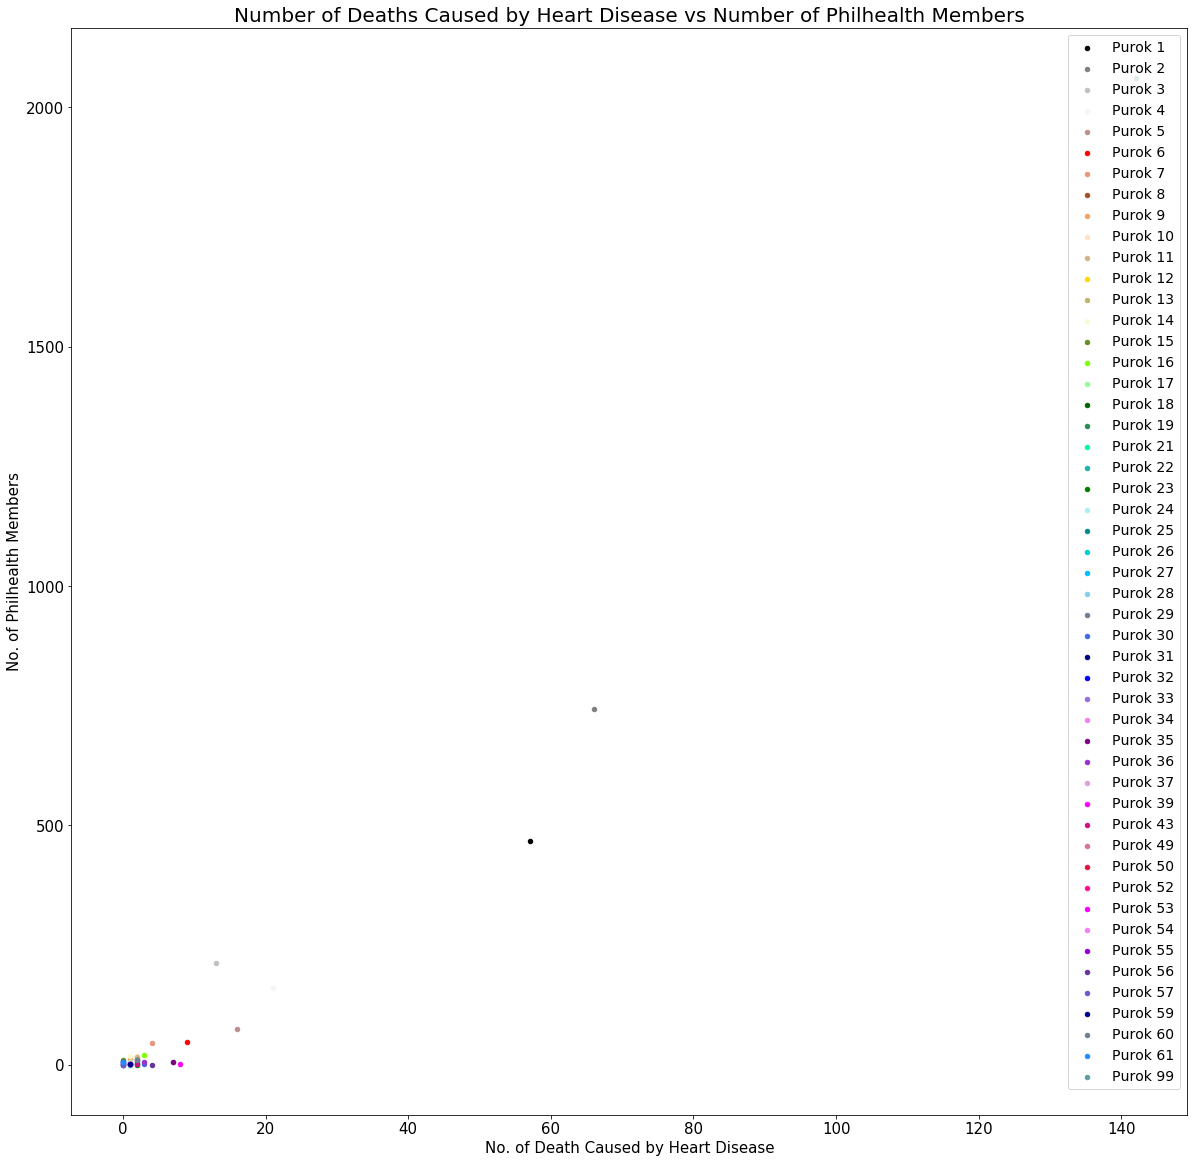

In [78]:
# DEATHS IN PUROK TOTAL VS NUMBER OF PHILHEALTH MEMBERS

ax = df_purok[df_purok.purok == 1].plot.scatter('num_death', 'num_prog', color='black', label = "Purok 1", figsize=(20,20))
df_purok[df_purok.purok == 2].plot.scatter('num_death', 'num_prog', ax=ax, color='gray', label = "Purok 2")
df_purok[df_purok.purok == 3].plot.scatter('num_death', 'num_prog', ax=ax, color='silver', label = "Purok 3")
df_purok[df_purok.purok == 4].plot.scatter('num_death', 'num_prog', ax=ax, color='whitesmoke', label = "Purok 4")
df_purok[df_purok.purok == 5].plot.scatter('num_death', 'num_prog', ax=ax, color='rosybrown', label = "Purok 5")
df_purok[df_purok.purok == 6].plot.scatter('num_death', 'num_prog', ax=ax, color='red', label = "Purok 6")
df_purok[df_purok.purok == 7].plot.scatter('num_death', 'num_prog', ax=ax, color='darksalmon', label = "Purok 7")
df_purok[df_purok.purok == 8].plot.scatter('num_death', 'num_prog', ax=ax, color='sienna', label = "Purok 8")
df_purok[df_purok.purok == 9].plot.scatter('num_death', 'num_prog', ax=ax, color='sandybrown', label = "Purok 9")
df_purok[df_purok.purok == 10].plot.scatter('num_death', 'num_prog', ax=ax, color='bisque', label = "Purok 10")
df_purok[df_purok.purok == 11].plot.scatter('num_death', 'num_prog', ax=ax, color='tan', label = "Purok 11")
df_purok[df_purok.purok == 12].plot.scatter('num_death', 'num_prog', ax=ax, color='gold', label = "Purok 12")
df_purok[df_purok.purok == 13].plot.scatter('num_death', 'num_prog', ax=ax, color='darkkhaki', label = "Purok 13")
df_purok[df_purok.purok == 14].plot.scatter('num_death', 'num_prog', ax=ax, color='lightgoldenrodyellow', label = "Purok 14")
df_purok[df_purok.purok == 15].plot.scatter('num_death', 'num_prog', ax=ax, color='olivedrab', label = "Purok 15")
df_purok[df_purok.purok == 16].plot.scatter('num_death', 'num_prog', ax=ax, color='chartreuse', label = "Purok 16")
df_purok[df_purok.purok == 17].plot.scatter('num_death', 'num_prog', ax=ax, color='palegreen', label = "Purok 17")
df_purok[df_purok.purok == 18].plot.scatter('num_death', 'num_prog', ax=ax, color='darkgreen', label = "Purok 18")
df_purok[df_purok.purok == 19].plot.scatter('num_death', 'num_prog', ax=ax, color='seagreen', label = "Purok 19")
df_purok[df_purok.purok == 21].plot.scatter('num_death', 'num_prog', ax=ax, color='mediumspringgreen', label = "Purok 21")
df_purok[df_purok.purok == 22].plot.scatter('num_death', 'num_prog', ax=ax, color='lightseagreen', label = "Purok 22")
df_purok[df_purok.purok == 23].plot.scatter('num_death', 'num_prog', ax=ax, color='green', label = "Purok 23")
df_purok[df_purok.purok == 24].plot.scatter('num_death', 'num_prog', ax=ax, color='paleturquoise', label = "Purok 24")
df_purok[df_purok.purok == 25].plot.scatter('num_death', 'num_prog', ax=ax, color='darkcyan', label = "Purok 25")
df_purok[df_purok.purok == 26].plot.scatter('num_death', 'num_prog', ax=ax, color='darkturquoise', label = "Purok 26")
df_purok[df_purok.purok == 27].plot.scatter('num_death', 'num_prog', ax=ax, color='deepskyblue', label = "Purok 27")
df_purok[df_purok.purok == 28].plot.scatter('num_death', 'num_prog', ax=ax, color='skyblue', label = "Purok 28")
df_purok[df_purok.purok == 29].plot.scatter('num_death', 'num_prog', ax=ax, color='slategray', label = "Purok 29")
df_purok[df_purok.purok == 30].plot.scatter('num_death', 'num_prog', ax=ax, color='royalblue', label = "Purok 30")
df_purok[df_purok.purok == 31].plot.scatter('num_death', 'num_prog', ax=ax, color='navy', label = "Purok 31")
df_purok[df_purok.purok == 32].plot.scatter('num_death', 'num_prog', ax=ax, color='blue', label = "Purok 32")
df_purok[df_purok.purok == 33].plot.scatter('num_death', 'num_prog', ax=ax, color='mediumpurple', label = "Purok 33")
df_purok[df_purok.purok == 34].plot.scatter('num_death', 'num_prog', ax=ax, color='violet', label = "Purok 34")
df_purok[df_purok.purok == 35].plot.scatter('num_death', 'num_prog', ax=ax, color='purple', label = "Purok 35")
df_purok[df_purok.purok == 36].plot.scatter('num_death', 'num_prog', ax=ax, color='darkorchid', label = "Purok 36")
df_purok[df_purok.purok == 37].plot.scatter('num_death', 'num_prog', ax=ax, color='plum', label = "Purok 37")
df_purok[df_purok.purok == 39].plot.scatter('num_death', 'num_prog', ax=ax, color='magenta', label = "Purok 39")
df_purok[df_purok.purok == 43].plot.scatter('num_death', 'num_prog', ax=ax, color='mediumvioletred', label = "Purok 43")
df_purok[df_purok.purok == 49].plot.scatter('num_death', 'num_prog', ax=ax, color='palevioletred', label = "Purok 49")
df_purok[df_purok.purok == 50].plot.scatter('num_death', 'num_prog', ax=ax, color='crimson', label = "Purok 50")
df_purok[df_purok.purok == 52].plot.scatter('num_death', 'num_prog', ax=ax, color='deeppink', label = "Purok 52")
df_purok[df_purok.purok == 53].plot.scatter('num_death', 'num_prog', ax=ax, color='fuchsia', label = "Purok 53")
df_purok[df_purok.purok == 54].plot.scatter('num_death', 'num_prog', ax=ax, color='violet', label = "Purok 54")
df_purok[df_purok.purok == 55].plot.scatter('num_death', 'num_prog', ax=ax, color='darkviolet', label = "Purok 55")
df_purok[df_purok.purok == 56].plot.scatter('num_death', 'num_prog', ax=ax, color='rebeccapurple', label = "Purok 56")
df_purok[df_purok.purok == 57].plot.scatter('num_death', 'num_prog', ax=ax, color='slateblue', label = "Purok 57")
df_purok[df_purok.purok == 59].plot.scatter('num_death', 'num_prog', ax=ax, color='darkblue', label = "Purok 59")
df_purok[df_purok.purok == 60].plot.scatter('num_death', 'num_prog', ax=ax, color='slategrey', label = "Purok 60")
df_purok[df_purok.purok == 61].plot.scatter('num_death', 'num_prog', ax=ax, color='dodgerblue', label = "Purok 61")
df_purok[df_purok.purok == 99].plot.scatter('num_death', 'num_prog', ax=ax, color='cadetblue', label = "Purok 99")

ax.legend(fontsize = 14)
ax.set_xlabel("No. of Death Caused by Heart Disease", fontdict=None, labelpad=None)
ax.set_ylabel("No. of Philhealth Members", fontdict=None, labelpad=None)
ax.set_title("Number of Deaths Caused by Heart Disease vs Number of Philhealth Members" , fontsize = 20)

#### FINDINGS

- There isn’t a lot of programs pertaining to heart disease offered per purok and not all of them are being offered programs.
- Despite having programs pertaining to heart disease, a lot of people still die from it. It doesn’t decrease the number of deaths. 
- Even though Philhealth doesn’t have actual activities that can be considered as preventive measures, we still considered it since it can still help them.
